LAB 7

In [2]:
import matplotlib.pyplot as plt
import numpy as np

1D

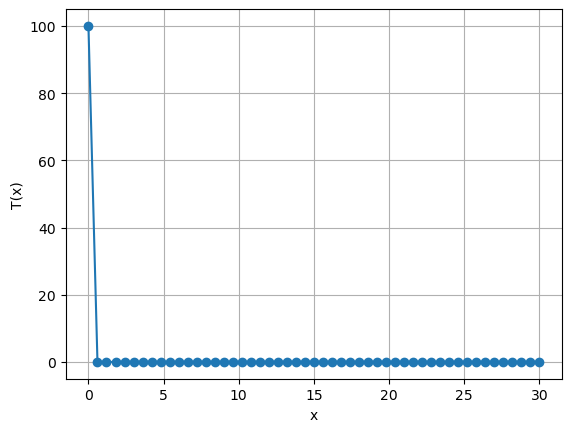

In [3]:
N = 50
L = 30
x = np.linspace(0, L, N + 1)
y = np.append(100, np.zeros(N))

plt.plot(x, y, '-o')
plt.xlabel("x")
plt.ylabel("T(x)")
plt.grid(True)
plt.show()

I will assume that we are using Dirichlet's boundary condition with fixed endpoint values

Converged after 6296 iterations


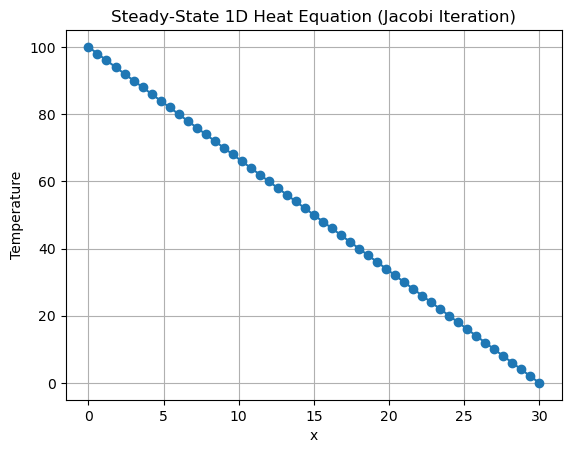

In [4]:
T_old = y
tol = 1e-6
max_iter = 10000

for it in range(max_iter):
    T_new = T_old.copy()

    for i in range(1, N):
        T_new[i] = 0.5 * (T_old[i - 1] + T_old[i + 1])

    T_new[0] = 100
    T_new[-1] = 0

    if np.max(np.abs(T_new - T_old)) < tol:
        print(f"Converged after {it+1} iterations")
        break

    T_old = T_new

T = T_new

plt.plot(x, T, '-o')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.title('Steady-State 1D Heat Equation (Jacobi Iteration)')
plt.grid(True)
plt.show()

2D

In [9]:
N = 50

Converged after 5716 iterations, max diff = 9.99e-07


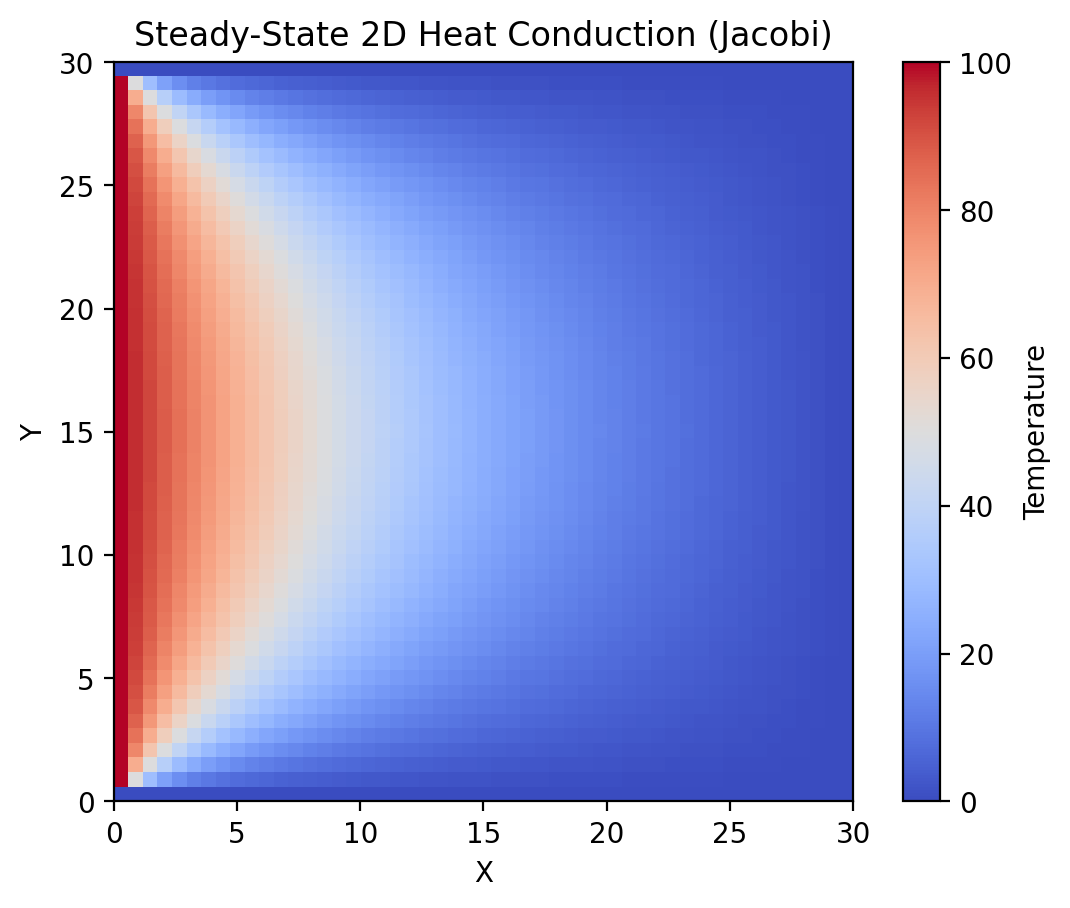

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Parameters
L = 30
N = 50
tol = 1e-6
max_iter = 10000

# Grid setup
X = np.linspace(0, L, N + 1)
Y = np.linspace(0, L, N + 1)
X, Y = np.meshgrid(X, Y)

# Initialize temperature field
T_old = np.zeros((N + 1, N + 1))
T_old[:, 0] = 100.0   # left wall hot
T_new = T_old.copy()

# Jacobi iteration
for it in range(max_iter):
    # Update interior points (skip boundaries)
    for i in range(1, N):
        for j in range(1, N):
            T_new[i, j] = 0.25 * (
                T_old[i+1, j] + T_old[i-1, j] +
                T_old[i, j+1] + T_old[i, j-1]
            )

    # Enforce Dirichlet BCs
    T_new[:, 0] = 100.0   # left wall
    T_new[:, -1] = 0.0    # right wall
    T_new[0, :] = 0.0     # top
    T_new[-1, :] = 0.0    # bottom

    # Check convergence
    diff = np.max(np.abs(T_new - T_old))
    if diff < tol:
        print(f"Converged after {it+1} iterations, max diff = {diff:.2e}")
        break

    T_old[:] = T_new

# Final steady-state field
T = T_new

# Plot heatmap (hot wall red → cold wall blue)
plt.figure(dpi=200)
plt.imshow(T, origin='lower', cmap='coolwarm', extent=[0, L, 0, L])
plt.colorbar(label='Temperature')
plt.title('Steady-State 2D Heat Conduction (Jacobi)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Saving as MP4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

# Parameters
N = 50
L = 30
x = np.linspace(0, L, N + 1)

# Initial condition
T_old = np.append(100, np.zeros(N))  # left = 100, right = 0
tol = 1e-6
max_iter = 2000

# Set up figure for animation
fig, ax = plt.subplots(dpi=200)
(line,) = ax.plot(x, T_old, 'ro-', mfc='w')
ax.set_xlim(0, L)
ax.set_ylim(0, 110)
ax.set_xlabel('x')
ax.set_ylabel('Temperature')
ax.set_title('1D Heat Conduction (Jacobi Iteration)')
ax.grid(True)

# Set up MP4 writer
metadata = dict(title='1D Heat Equation', artist='Matplotlib', comment='Jacobi Iteration Convergence')
writer = FFMpegWriter(fps=20, metadata=metadata)

# Start recording
with writer.saving(fig, "heat1D.mp4", dpi=200):
    for it in range(max_iter):
        T_new = T_old.copy()

        # Jacobi update for interior points
        for i in range(1, N):
            T_new[i] = 0.5 * (T_old[i - 1] + T_old[i + 1])

        # Dirichlet boundaries
        T_new[0] = 100
        T_new[-1] = 0

        # Plot update every few iterations
        if it % 10 == 0:
            line.set_ydata(T_new)
            ax.set_title(f'1D Jacobi Iteration {it}')
            plt.draw()
            writer.grab_frame()

        # Check convergence
        if np.max(np.abs(T_new - T_old)) < tol:
            print(f"Converged after {it+1} iterations")
            # Final frame
            line.set_ydata(T_new)
            ax.set_title(f'Converged after {it+1} iterations')
            writer.grab_frame()
            break

        T_old = T_new

plt.close(fig)


✅ Saved animation as heat1D.mp4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

# Parameters
L = 30
N = 50
tol = 1e-6
max_iter = 2000

# Grid setup
X = np.linspace(0, L, N + 1)
Y = np.linspace(0, L, N + 1)
X, Y = np.meshgrid(X, Y)

# Initialize temperature field
T_old = np.zeros((N + 1, N + 1))
T_old[:, 0] = 100.0   # left wall hot
T_new = T_old.copy()

# Set up figure
fig, ax = plt.subplots(dpi=200)
im = ax.imshow(T_old, origin='lower', cmap='coolwarm', extent=[0, L, 0, L], vmin=0, vmax=100)
cbar = fig.colorbar(im, ax=ax, label='Temperature (°C)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D Heat Diffusion (Jacobi Iteration)')

# Set up MP4 writer
metadata = dict(title='2D Heat Equation', artist='Matplotlib', comment='Jacobi Iteration Animation')
writer = FFMpegWriter(fps=15, metadata=metadata)

# Animate and save
with writer.saving(fig, "heat2D.mp4", dpi=200):
    for it in range(max_iter):
        # Jacobi update
        for i in range(1, N):
            for j in range(1, N):
                T_new[i, j] = 0.25 * (
                    T_old[i+1, j] + T_old[i-1, j] +
                    T_old[i, j+1] + T_old[i, j-1]
                )

        # Dirichlet boundaries
        T_new[:, 0] = 100.0
        T_new[:, -1] = 0.0
        T_new[0, :] = 0.0
        T_new[-1, :] = 0.0

        # Visualization update every few iterations
        if it % 25 == 0:
            im.set_data(T_new)
            ax.set_title(f"Jacobi Iteration {it}")
            plt.draw()
            writer.grab_frame()

        # Check for convergence
        diff = np.max(np.abs(T_new - T_old))
        if diff < tol:
            print(f"✅ Converged after {it+1} iterations, max diff = {diff:.2e}")
            im.set_data(T_new)
            ax.set_title(f"Final (Converged at Iter {it+1})")
            writer.grab_frame()
            break

        T_old[:] = T_new

plt.close(fig)


🎬 Saved animation as heat2D.mp4
